# Principio de Inversión de Dependencias (Dependency Inversion Principle)

## Introducción
El principio de inversión de dependencias (DIP) establece que los módulos de alto nivel no deben depender de módulos de bajo nivel, sino de abstracciones. Las abstracciones no deben depender de los detalles, sino los detalles de las abstracciones.

## Objetivos
- Comprender el principio de inversión de dependencias y su impacto en la arquitectura de software.
- Identificar dependencias rígidas en código Python.
- Aplicar el DIP para lograr sistemas desacoplados y flexibles.

## Ejemplo de la vida real
En una empresa, los empleados (alto nivel) no dependen de un tipo específico de transporte para llegar al trabajo (bajo nivel), sino de la abstracción "transporte" (puede ser bus, bicicleta, auto, etc.).

# Principio de Inversión de Dependencias (Dependency Inversion Principle, DIP)

## Introducción

El Principio de Inversión de Dependencias (DIP) es uno de los cinco principios SOLID de diseño orientado a objetos. Fue introducido por Robert C. Martin y establece que los módulos de alto nivel no deben depender de módulos de bajo nivel, ambos deben depender de abstracciones. Además, las abstracciones no deben depender de los detalles, los detalles deben depender de las abstracciones.

## Explicación Detallada

### Definición

- **DIP**: Los módulos de alto nivel no deben depender de módulos de bajo nivel. Ambos deben depender de abstracciones. Las abstracciones no deben depender de los detalles, los detalles deben depender de las abstracciones. En otras palabras, los módulos de alto nivel no deben depender de los módulos de bajo nivel, sino de abstracciones.

### Beneficios del DIP

1. **Flexibilidad**: Facilita el cambio de implementaciones sin afectar a los módulos de alto nivel.

2. **Mantenibilidad**: Mejora la mantenibilidad del código al reducir las dependencias directas entre módulos.

3. **Reusabilidad**: Promueve la creación de componentes reutilizables y desacoplados.

## Ejemplos Explicados

### Ejemplo Correcto

Supongamos que estamos desarrollando una aplicación para enviar notificaciones. Aplicando el DIP, podríamos tener las siguientes interfaces y clases:

In [1]:
from abc import ABC, abstractmethod

from pkg_resources import safe_extra

from solid.single_responsibility import usuario


class Notifier(ABC):
    @abstractmethod
    def send(self, message: str) -> None:
        pass


class EmailNotifier(Notifier):
    def send(self, message: str) -> None:
        print(f"Enviando email: {message}")


class SMSNotifier(Notifier):
    def send(self, message: str) -> None:
        print(f"Enviando SMS: {message}")


class NotificationService:
    def __init__(self, notifier: Notifier) -> None:
        self.notifier: Notifier = notifier

    def notify(self, message: str) -> None:
        self.notifier.send(message)

In [2]:
# Ejemplo de uso
email_notifier = EmailNotifier()
sms_notifier = SMSNotifier()

In [3]:
notification_service = NotificationService(email_notifier)
notification_service.notify("Hola por email")

notification_service = NotificationService(sms_notifier)
notification_service.notify("Hola por SMS")

Enviando email: Hola por email
Enviando SMS: Hola por SMS


#### Análisis del Ejemplo Correcto

- **Notifier**: Es una interfaz que define el método `send`.

- **EmailNotifier** y **SMSNotifier**: Son implementaciones concretas de la interfaz `Notifier`.

- **NotificationService**: Depende de la abstracción `Notifier` y no de las implementaciones concretas.

Este diseño permite cambiar la implementación del notificador sin modificar el `NotificationService`.

### Ejemplo de Violación del DIP

Veamos un ejemplo donde se viola el DIP:

In [4]:
class EmailNotifier:
    def send(self, message: str) -> None:
        print(f"Enviando email: {message}")


class NotificationService:
    def __init__(self) -> None:
        self.email_notifier = EmailNotifier()

    def notify(self, message: str) -> None:
        self.email_notifier.send(message)

In [5]:
# Ejemplo de uso
notification_service = NotificationService()
notification_service.notify("Hola por email")

Enviando email: Hola por email


#### Análisis del Ejemplo Incorrecto

- **NotificationService**: Depende directamente de la implementación concreta `EmailNotifier`.

- Si en el futuro queremos cambiar la implementación de `EmailNotifier` por `SMSNotifier`, deberemos modificar el `NotificationService`.

Este diseño viola el DIP porque cualquier cambio en la forma de enviar notificaciones requerirá modificar el `NotificationService`.

## Conclusión

1. **Desacoplamiento**: El DIP promueve el desacoplamiento entre módulos de alto y bajo nivel.

2. **Flexibilidad**: Facilita el cambio de implementaciones sin afectar a los módulos de alto nivel.

3. **Mantenibilidad**: Mejora la mantenibilidad del código al reducir las dependencias directas entre módulos.

4. **Reusabilidad**: Promueve la creación de componentes reutilizables y desacoplados.

Aplicar el DIP puede requerir la creación de interfaces y abstracciones adicionales, pero los beneficios en términos de flexibilidad y mantenibilidad del software son significativos.

## Ejercicios prácticos y preguntas de reflexión

1. **Identifica dependencias rígidas**: Analiza un módulo que dependa directamente de implementaciones concretas. ¿Cómo podrías introducir una abstracción?
2. **Refactoriza**: Usa interfaces o clases abstractas para desacoplar módulos de alto y bajo nivel.
3. **Pregunta de reflexión**: ¿Qué ventajas aporta el DIP en proyectos donde los requisitos cambian frecuentemente?

## Autoevaluación
- ¿Mis módulos de alto nivel dependen de abstracciones y no de detalles?
- ¿Qué patrones de diseño ayudan a implementar el DIP?

## Referencias y recursos
- [Dependency Inversion Principle – Wikipedia](https://en.wikipedia.org/wiki/Dependency_inversion_principle)
- [SOLID Principles en Python – Real Python](https://realpython.com/solid-principles-python/)
- [Ejemplo didáctico de DIP – Refactoring Guru](https://refactoring.guru/es/design-patterns/dependency-inversion-principle)

@startuml
class User {
    - name: str
    - dni: str
    - id: int
    + set_id(id: int): None
}

Interface Repository {
    + save(user: User): int
    + get_all(): list[User]
}

class RepositoryRelacionalDB {
    - usuarios: list[User]
    + save(user: User): int
    + get_all(): list[User]
    + __seq(): int
}
class RepositoryNoRelacional {
    - usuarios: list[User]
    + save(user: User): int
    + get_all(): list[User]
    + __seq(): int
}



class ServiceUsuario {
    - repository: Repository
    + guardar(usr: User)
    + get_all(): list[User]
}
Repository <|.. RepositoryNoRelacional
Repository <|.. RepositoryRelacionalDB
Repository o-- ServiceUsuario : uses
User o-- Repository
@enduml
- ### [URL](https://editor.plantuml.com/uml/lPAzQWCn3CTtWzz1uuLoUG3J8PGkNJAaP2hX46Ur61mxjNo1akRTg-HoyLrBe7IeDttzzREa1MTCkTjwhLgFpB1cId3G2kJL471B1ZYdmM63czZE6d0Xz-OTCEN6sUhYdHbOna1Q7RNIwYbaIg_O4gne5zdbc3w6JbA9UwewQMxE2BE9x9l8elULUBtZ_7BAs5naU-mYkIAFhOi1_UD3-KZ77IONUIhmzzPzi6cOtgkXuFWJPXaBph_3Q3KQzFtdV7u3h4pncTBUjRJk-GfmkjQPaSQLIh8j9g4Ue7-pjzjiumrEyc9TVqSqCanYhSvdUugFyHOKh9ps5m00)

!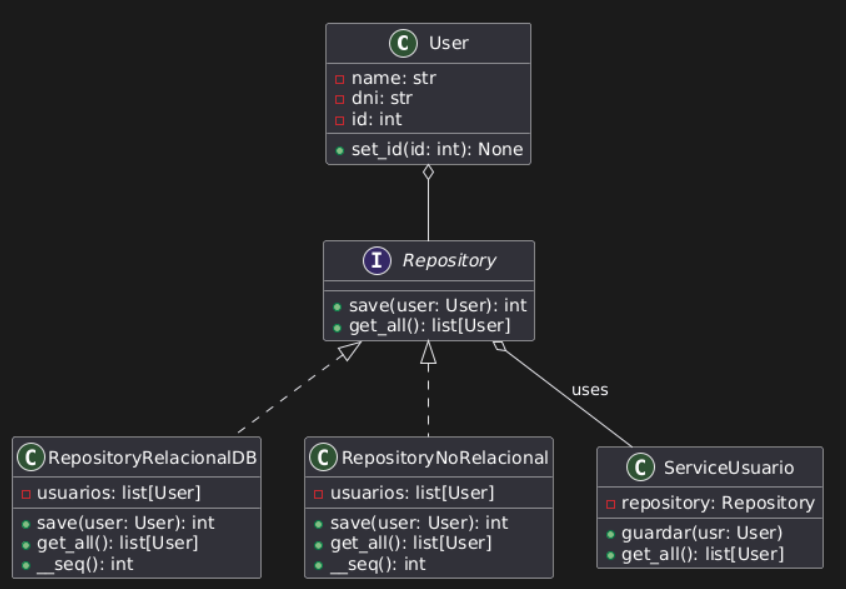
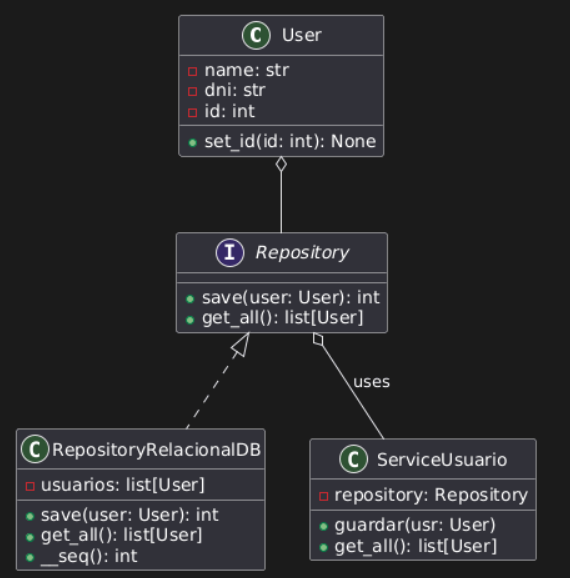

In [14]:
from abc import ABC, abstractmethod
import random


class User:
    def __init__(self, name: str, dni: str) -> None:
        self.name: str = name
        self.dni: str = dni
        self.id: int = None

    def set_id(self, id: int) -> None:
        self.id: int = id

    def __str__(self):
        return f"(nombre: {self.name}, dni: {self.dni}, id: {self.id})"


class Repository(ABC):

    @abstractmethod
    def save(self, user: User) -> int: ...

    @abstractmethod
    def get_all(self) -> list[User]: ...


class RepositoryRelacionalDB(Repository):
    usuarios: list[User] = []

    @classmethod
    def __seq(cls) -> int:
        return len(cls.usuarios) + 1

    def save(self, user: User) -> int:
        id = self.__seq()
        user.set_id(id)
        self.usuarios.append(user)
        return id

    def get_all(self) -> list[User]:
        return self.usuarios.copy()


class RepositoryNoRelacional(Repository):
    usuarios: list[User] = []

    @classmethod
    def __seq(cls) -> int:
        return len(cls.usuarios) + 1 + random.randint(1000, 9999)

    def save(self, user: User) -> int:
        id = self.__seq()
        user.set_id(id)
        self.usuarios.append(user)
        return id

    def get_all(self) -> list[User]:
        return self.usuarios.copy()


class ServiceUsuario:

    def __init__(self, repository: Repository) -> None:
        self.__repository: Repository = repository

    def guardar(self, usr: User):
        self.__repository.save(usr)

    def get_all(self) -> list[User]:
        return self.__repository.get_all()


service = ServiceUsuario(repository=RepositoryRelacionalDB())
service2 = ServiceUsuario(repository=RepositoryNoRelacional())

usuario = User(name="Marcos", dni="123456")
service.guardar(usuario)
usuario2 = User(name="Andres", dni="12d3456")

service2.guardar(usuario2)
for item in service.get_all():
    print(item)
for item in service2.get_all():
    print(f" usuario: {item}")


(nombre: Marcos, dni: 123456, id: 1)
 usuario: (nombre: Andres, dni: 12d3456, id: 3596)


# Mala implementación

- ### UML
@startuml
class User {
    - name: str
    - dni: str
    - id: int
    + set_id(id: int): None
}

class RepositoryDbOracle {
    - usuarios: list[User]
    + guardar(user: User): int
    + get_all(): list[User]
    + __seq(): int
}

class Service1Usuario {
    - __repository: RepositoryNoRelacional
    + guardar_usuario_bd_relacional(user: User): int
    + get_all(): list[User]
}

User o-- RepositoryDbOracle : usuarios
RepositoryDbOracle o-- Service1Usuario : dependencia
@enduml

- ### [URL](https://editor.plantuml.com/uml/bP4zQmCn38PtW_-3nZlA3LqzPUYSGagc4enYYo1mxDJo5KBfVwzpYVF5BVLaINxrFfOMKZ2NSH-qSW55O2sKuKShg6U0Y7io82MtX8_y4BCtmB6SmnSGAfPzTyds1fOfabQ_MhN-ApeauPBoyMtxdj45khcDCcBc90O2I_ayeMnQvrqjUSpTM9DcekmVd7VL6KFe-ZcnjK9VNHFSqNnG_cP7h-kpymt5sdm5DNVGoxIYW8vJnF24PY_uTkkhk3twB_04DoqX3SFSjCnrJ5hDb4-gvryPy7IWw2awHgqMzLet_WS0)

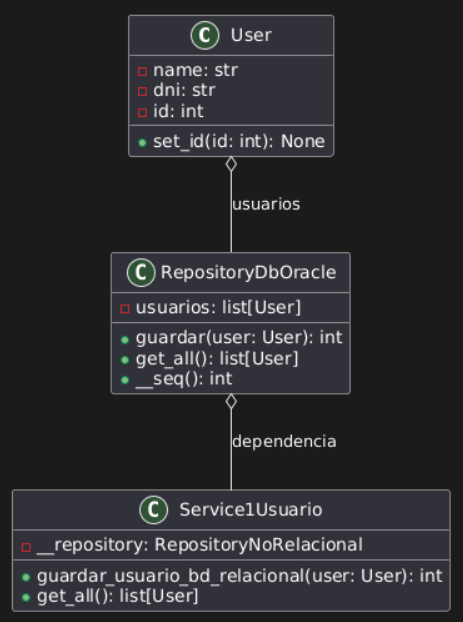

In [22]:
class RepositoryDbOracle:
    usuarios: list[User] = []

    @classmethod
    def __seq(cls) -> int:
        return len(cls.usuarios) + 1

    def guardar(self, user: User) -> int:
        id = self.__seq()
        user.set_id(id)
        self.usuarios.append(user)
        return id

    def get_all(self) -> list[User]:
        return self.usuarios.copy()


class Service1Usuario:

    def __init__(self, repository: RepositoryDbOracle) -> None:
        self.__repository: RepositoryNoRelacional = repository

    def guardar_usuario_bd_relacional(self, user: User) -> int:
      return self.__repository.guardar(user)

    def get_all(self) -> list[User]:
        return self.__repository.get_all().copy()

usuario = User(name="Jaime", dni="7867587")
usuario4= User(name="Ricardo", dni="AC0017867587")
service = Service1Usuario(RepositoryDbOracle())
service2 = Service1Usuario(RepositoryRelacionalDB())

service.guardar_usuario_bd_relacional(usuario)
for item in service.get_all():
    print(f"{item}")

service2.guardar_usuario_bd_relacional(usuario4) # el sistema esta acoplado a la tecnologia de DB especifica, no sigue los contratos

(nombre: Jaime, dni: 7867587, id: 1)


AttributeError: 'RepositoryRelacionalDB' object has no attribute 'guardar'